<a href="https://colab.research.google.com/github/jnsbrdbr/new_thesiis/blob/main/9.4_logesticregression13214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 22.7 MB/s 


In [4]:
with open('/content/drive/MyDrive/10000/Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [5]:
#final data
print(result)

               0         1         2         3         4         5         6  \
0      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
1      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
2      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
3      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
4      -2.178710 -3.260547 -0.698874 -1.030967 -0.723695 -1.028303 -0.406622   
...          ...       ...       ...       ...       ...       ...       ...   
13209  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13210  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13211  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13212  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13213  27.606119  6.905609  0.154864  0.191890  0.097248  0.114301  0.021144   

              7         8         9  ..

# **logestic** **regression**

In [6]:
#divide data in to data_label and non_data label

y=result.label
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(y)):
  if y[i]==1:
    y[i]=0
  else:
    y[i]=1

In [7]:
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel

In [8]:
#splitting data in to test and train...

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True)

In [9]:
#train the data

logisticRegr = LogisticRegression(penalty='l2', C=0.1,solver='newton-cg',max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')

In [10]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9440100882723833


Accuracy:  0.9440100882723833




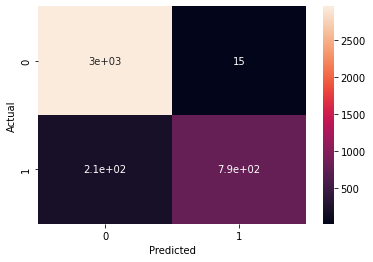

In [11]:
#Accuracy

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
print('\n')
#plotting confusion_matrix

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
#cross_validation and accracy

cv = KFold(n_splits=10, shuffle=True)#, random_state=42
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.953 (0.009)


In [13]:
#recall/TPR

cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv)

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.818 (0.017)


In [14]:
#precision

cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv)

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.994 (0.003)


In [15]:
#FPR
from sklearn.metrics import confusion_matrix
kf = KFold(n_splits=10)
res_fpr = list()

for train_index , test_index in kf.split(X):

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
    logisticRegr.fit(X_train,Y_train)
    pred_values = logisticRegr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    print('\n')
    fpr=(np.divide(fp,(fp+tn)))
    if fp==0:
      fpr=0

    
    print(' fpr=%.3f' % (  mean(fpr)))
    res_fpr.append(mean(fpr))
    print('---------------------')
     
total_fpr=np.sum(res_fpr)/10
print('\n\n','total_fpr=%.3f' % (total_fpr))

True Positives: 802
False Positives: 7
True Negatives: 2965
False Negatives: 191


 fpr=0.002
---------------------
True Positives: 782
False Positives: 3
True Negatives: 2992
False Negatives: 188


 fpr=0.001
---------------------
True Positives: 805
False Positives: 6
True Negatives: 2973
False Negatives: 181


 fpr=0.002
---------------------
True Positives: 782
False Positives: 4
True Negatives: 2982
False Negatives: 197


 fpr=0.001
---------------------
True Positives: 775
False Positives: 3
True Negatives: 2984
False Negatives: 203


 fpr=0.001
---------------------
True Positives: 805
False Positives: 5
True Negatives: 2974
False Negatives: 181


 fpr=0.002
---------------------
True Positives: 800
False Positives: 6
True Negatives: 2963
False Negatives: 196


 fpr=0.002
---------------------
True Positives: 799
False Positives: 2
True Negatives: 2950
False Negatives: 214


 fpr=0.001
---------------------
True Positives: 787
False Positives: 16
True Negatives: 2954
False Negat

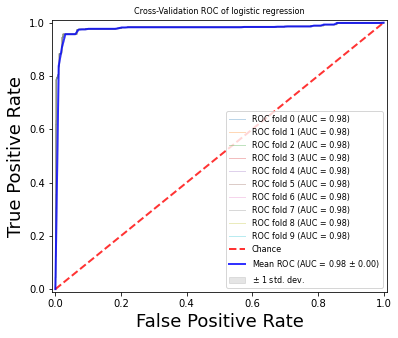

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
#from scipy import interp
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(6,5))
i = 0
for train, test in cv.split(X, y):
    probas_ = logisticRegr.fit(x_train, y_train).predict_proba(x_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of logistic regression',fontsize=8)
plt.legend(loc="lower right", prop={'size': 8})
plt.show()